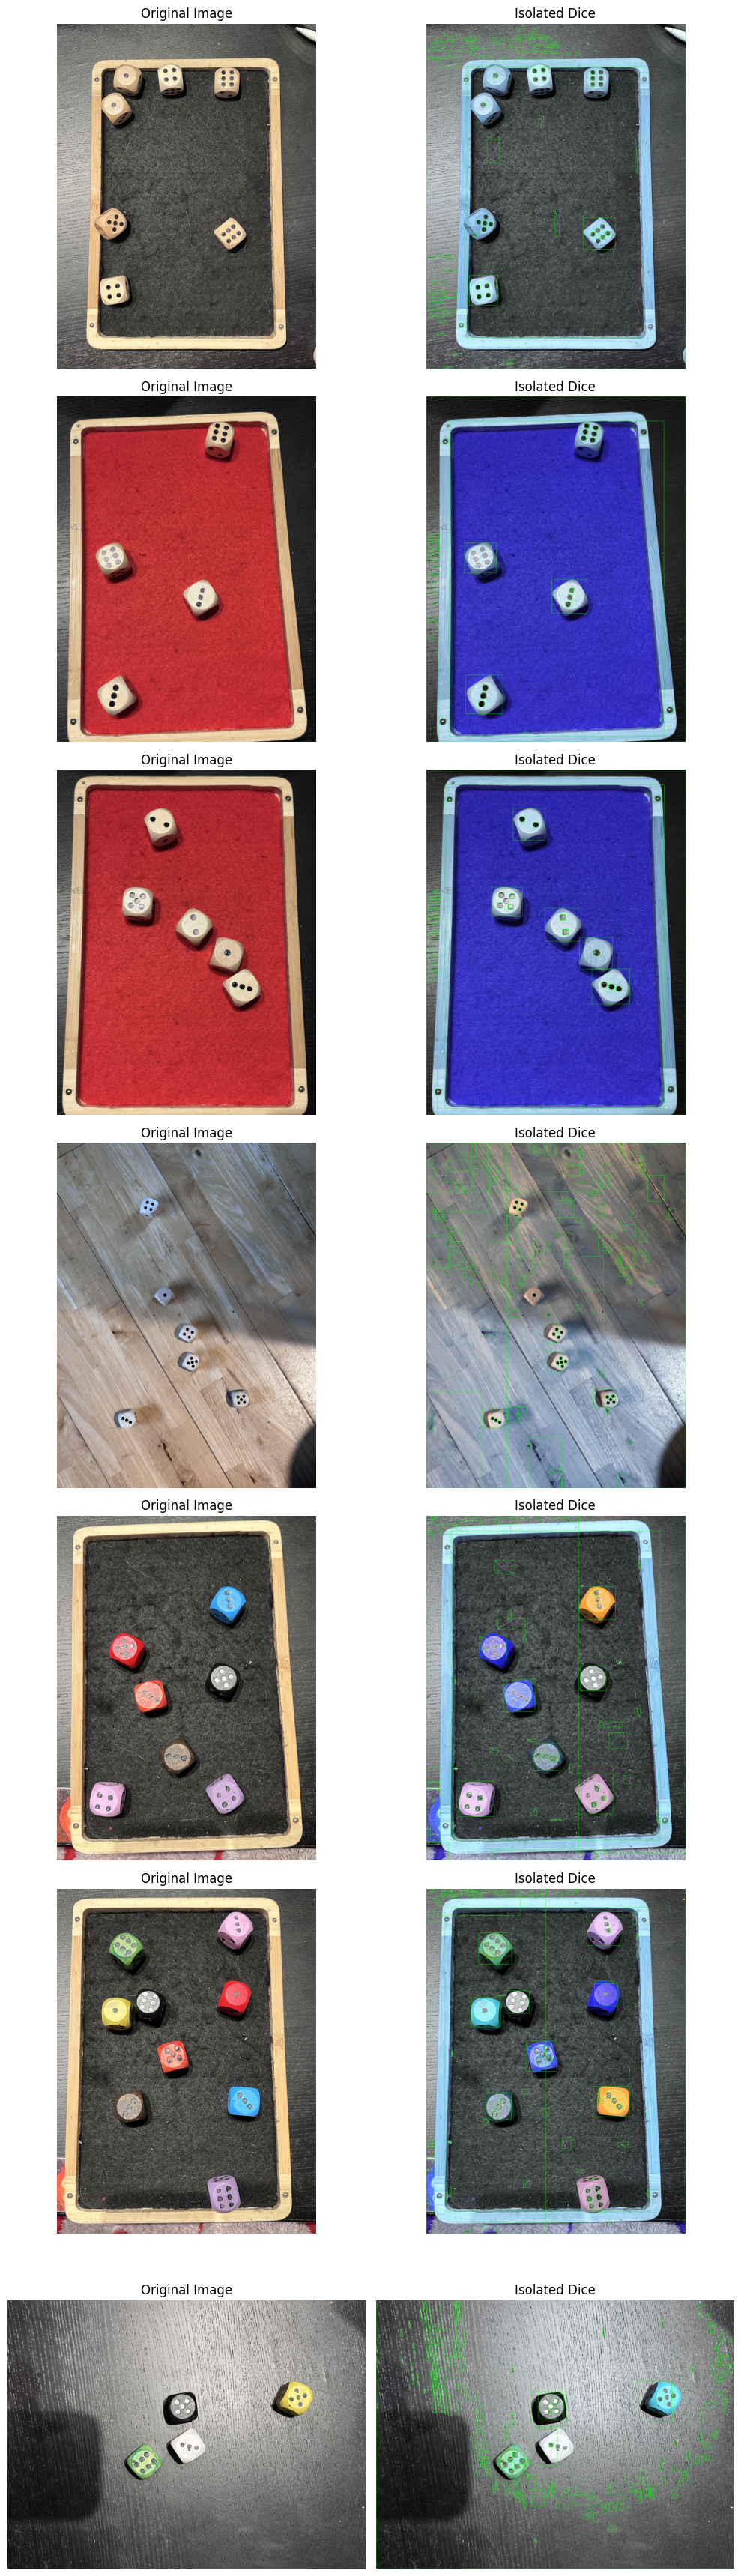

In [41]:
import cv2
import os
import numpy as np
from matplotlib import pyplot as plt

def isolate_dice_with_edges(image):
    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Add Gaussian Blur
    gray_blurred = cv2.GaussianBlur(gray, (15, 15), 0)
    
    # Use thresholding to isolate the dice
    #_, thresh = cv2.threshold(gray, 120, 255, cv2.THRESH_BINARY_INV)
    # Use Adaptive Thresholding
    thresh = cv2.adaptiveThreshold(gray_blurred, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 11, 4)

    # Find contours
    contours, _ = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    
    # Draw contours on the original image
    contoured_image = image.copy()
    for contour in contours:
        # Calculate contour area and ignore small areas
        if cv2.contourArea(contour) > 2500:
            x, y, w, h = cv2.boundingRect(contour)
            cv2.rectangle(contoured_image, (x, y), (x+w, y+h), (255, 255, 255), 5)
    
    # Convert the image to RGB format for plotting
    contoured_image_rgb = cv2.cvtColor(contoured_image, cv2.COLOR_BGR2RGB)
    
    return contoured_image_rgb
    
# Function to display original and isolated dice images using edge detection
def display_original_and_isolated_with_edges(directory):
    # List all image files in the directory
    image_files = [f for f in os.listdir(directory) if f.endswith(('.png', '.jpg', '.jpeg'))]
    
    # Calculate the number of rows needed for the subplot (2 images per set)
    num_images = len(image_files)
    cols = 2  # Columns dislayed
    rows = num_images  # One row per image

    # Create a figure with subplots
    fig, axs = plt.subplots(rows, cols, figsize=(10, 5 * rows))

    if rows > 1:
        axs = axs.ravel()
    else:
        axs = [axs]

    for i, img_file in enumerate(image_files):
        # Read each image
        img = cv2.imread(os.path.join(directory, img_file))

        # Isolate the dice from the image using edge detection
        isolated_dice = isolate_dice_with_edges(img)

        # Convert the images from BGR to RGB
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        isolated_rgb = cv2.cvtColor(isolated_dice, cv2.COLOR_BGR2RGB)

        # Display the original image
        axs[2*i].imshow(img_rgb)
        axs[2*i].set_title('Original Image')
        axs[2*i].axis('off')

        # Display the isolated dice image
        axs[2*i + 1].imshow(isolated_rgb)
        axs[2*i + 1].set_title('Isolated Dice')
        axs[2*i + 1].axis('off')

    plt.tight_layout()
    plt.show()

# Define the path to the images directory
directory_path = './images'
display_original_and_isolated_with_edges(directory_path)
